In [2]:
# Earth Engine Python API

# NEED TO AUTHENTICATE EVERY 10 DAYS FOR THE UPDATE
import ee
#ee.Authenticate()
ee.Initialize()


Successfully saved authorization token.


In [3]:
EE_TILES = 'https://earthengine.googleapis.com/map/{mapid}/{{z}}/{{x}}/{{y}}?token={token}'

In [30]:

import json
from datetime import date, timedelta

In [44]:


config = json.load(open('config.json'))
bounding_box = json.load(open('../bounding_box.json'))

In [45]:

def get_bounding_dates(config):
    latency = config["latency"]
    maxdate = date.today()
    mindate = maxdate - timedelta(days=10)
    mindate = mindate - timedelta(days=latency)
    maxdate = maxdate - timedelta(days=latency)
    return mindate.strftime('%Y-%m-%d'), maxdate.strftime('%Y-%m-%d')

In [46]:
print( get_bounding_dates(config) )

('2022-05-01', '2022-05-11')


In [38]:
maxdate, mindate = get_bounding_dates()
for city in bounding_box:
    for dataset in config["datasets"]:
        

SyntaxError: incomplete input (2036158129.py, line 4)

In [6]:
cities = [
    'Cairo',
    'Johannesburg',
    'Adana',
    'Manisa',
    'Trabzon',
    'Ordu'
]
for city in cities:
    downloadAsLink(collection, city, year)

30.901246950909442 29.26757452563548 31.671249300489013 30.557135443844295
27.57207214942911 -26.50390775621219 28.50814380231754 -25.779149542830158
35.08695298154546 36.92608724187569 35.465465387034506 37.06700972065142
27.29320940765252 38.597151928044646 27.51435038759405 38.70373649903113
39.477534235526726 40.92925203259588 39.90549560718303 41.09119882610807
37.78862041795756 40.920259345847086 38.08244875431813 41.02820183003089


In [7]:
import rasterio
path = os.path.join("..", "data", "lst", "")
src = rasterio.open(path+'Cairo_2021_1.tif')
src.crs
src.read().shape

Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


(2, 144, 87)

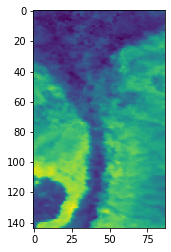

In [8]:
w = src.read(1)
plt.imshow(w)